In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import skimage

In [2]:
def show_img(array: np.ndarray):
    plt.axis('off')
    plt.imshow(array)
    plt.show()

TypeError: Invalid shape (8,) for image data

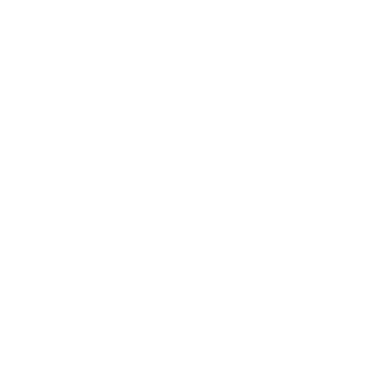

In [66]:
import collections

image = skimage.data.camera()
image //= 32
hist = np.zeros(8, dtype=np.uint64)
dct = collections.Counter(image.flatten())
val = np.array([*dct.keys()]).astype(int)
cnt = np.array([*dct.values()]).astype(int)

hist[val] = cnt

show_img(hist)

ValueError: could not broadcast input array from shape (70,512) into shape (70,)

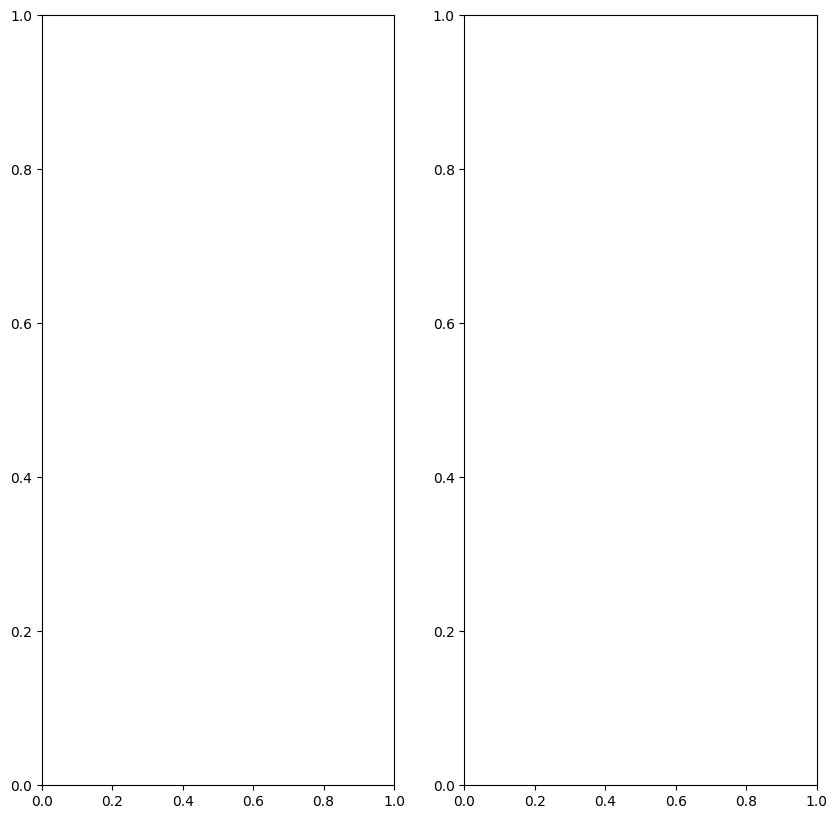

In [82]:
image = skimage.data.moon()
hist, bins = np.histogram(image, bins=256, range=(0, 256))

# create plot with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

l_min = min(hist)
l_max = max(hist)
l_new_max = 200
l_new_min = 25

a = 80
b = 150

new_img = np.zeros(shape=(256,), dtype=np.uint8)
new_img[a:b] = 255 * (image[a:b] - l_min) // (l_max - l_min)
new_img[:a] = 0
new_img[b:] = 255

img2 = new_img[image]

ax[0].imshow(new_img, cmap='gray')
ax[1].plot(hist)
plt.show()

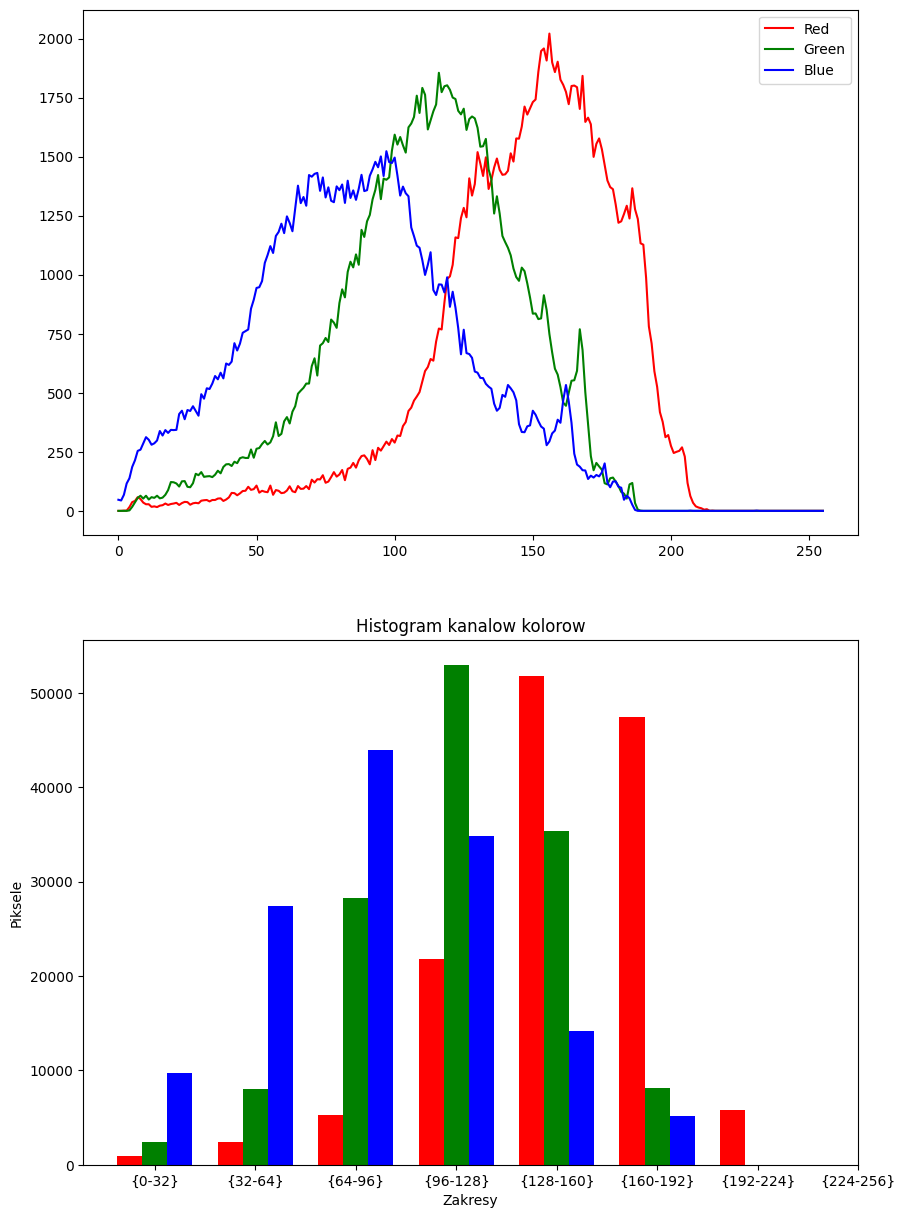

In [6]:
image = skimage.data.chelsea()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))

red_hist, red_bins = np.histogram(image[:, :, 0], bins=256, range=(0, 256))
green_hist, green_bins = np.histogram(image[:, :, 1], bins=256, range=(0, 256))
blue_hist, blue_bins = np.histogram(image[:, :, 2], bins=256, range=(0, 256))

ax1.plot(red_hist, color='red')
ax1.plot(green_hist, color='green')
ax1.plot(blue_hist, color='blue')
ax1.legend(['Red', 'Green', 'Blue'])

# create histogram for red channel with 32 bins
r_hist, r_bins = np.histogram(image[:, :, 0], bins=[x for x in range(0, 256, 32)], range=(0, 256))
g_hist, g_bins = np.histogram(image[:, :, 1], bins=[x for x in range(0, 256, 32)], range=(0, 256))
b_hist, b_bins = np.histogram(image[:, :, 2], bins=[x for x in range(0, 256, 32)], range=(0, 256))

ax2.title.set_text('Histogram kanalow kolorow')
ax2.set_xlabel('Zakresy')
ax2.set_ylabel('Piksele')

ax2.bar(r_bins[:-1], r_hist, width=8, color='red')
ax2.bar(g_bins[:-1] + 8, g_hist, width=8, color='green')
ax2.bar(b_bins[:-1] + 16, b_hist, width=8, color='blue')


labels = [f'{{{x}-{x + 32}}}' for x in range(0, 256, 32)]
ax2.set_xticks([x + 8 for x in range(0, 256, 32)])
ax2.set_xticklabels(labels, fontsize=10)
plt.show()

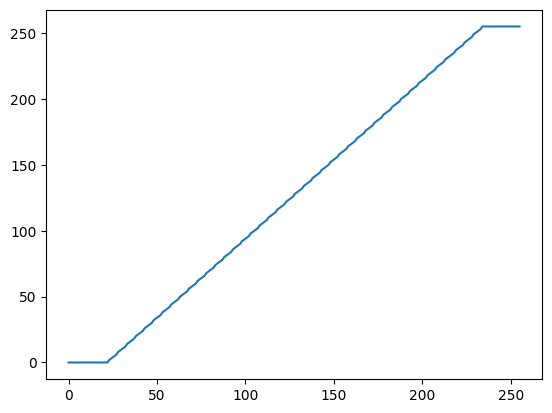

In [21]:
def func(a: float, x: int):
    pkt_x, pkt_y = (128, 128)
    b = pkt_y - (a * pkt_x)
    y = a * x + b
    y = int(y)

    if y < 0:
        y = 0
    elif y > 255:
        y = 255

    return y

# lookup table
lut = np.array([func(1.2, x) for x in range(0, 256)], dtype=np.uint8)

plt.plot(lut)
plt.show()

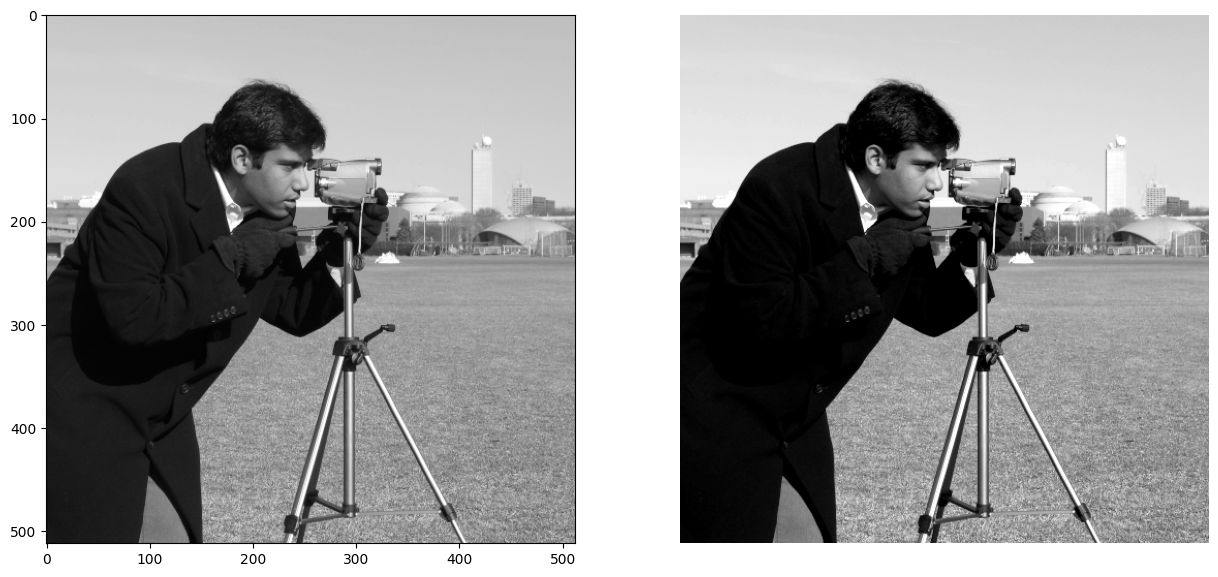

In [22]:
image = skimage.data.camera()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax1.imshow(image, cmap='gray')

converted = lut[image]
ax2.imshow(converted, cmap='gray')

plt.axis('off')
plt.show()